Welcome to my code notebook for this project! Here, you'll find my code for the project as well as some documentation for the steps I take.   
  
I'll begin by importing some Python packages and importing a CSV file with all my websites in them.

In [1]:
import glob
import nltk
import pandas as pd
import matplotlib as plt

In [2]:
data = pd.read_csv('../fulldata/sites.csv')

In [3]:
data

,filename,websites,titles
0,theatlantic.txt,theatlantic.com,The Atlantic
1,imdb.txt,imdb.com,IMDB
2,nytimes.txt,nytimes.com,The New York Times
3,voxmedia.txt,voxmedia.com,Vox
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media
...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News
109,lids.txt,lids.com,Lids
110,sports-reference.txt,sports-reference.com,Sports Reference
111,foxsports.txt,foxsports.com,Fox Sports Insider


Our dataframe here is 113 rows x 3 columns, so there are a total of 113 websites in my dataset. These websites include news sites, social media sites, and business sites. 
  
Next, I will import the content of the privacy policies from the text files that I converted to text from HTML. I was going to try to read in the HTML files with a Python package called BeautifulSoup, but it was giving me trouble. I make use of the glob package here to read in each of the contents of the files and match them up to their respective websites. 

In [4]:
filepath = '../fulldata/textpolicies/'
def readtxt(fn):
    f = open(glob.glob(filepath + fn)[0])
    text = f.read()
    f.close()
    return text

data['content'] = data['filename'].apply(readtxt)

data.head()

,filename,websites,titles,content
0,theatlantic.txt,theatlantic.com,The Atlantic,"*Privacy Policy *\n\n*Effective: January 1, 20..."
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice\n\n|||Last Updated, Decemb..."
2,nytimes.txt,nytimes.com,The New York Times,"*Privacy Policy *\n\nLast Updated on June 10, ..."
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy\n\n|||*Updated as of ...
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy\n\nLast updated: 14 Januar...


In [5]:
len(data)

113

As you can see, there's a lot of non-alphanumeric symbols in here. There's asterisks for denoting bold, newline characters, and three vertical bars that denote headings. These aren't relevant to the analysis I'm going to perform, so I am going to drop these characters by splitting the strings by a character into an array of strings, joining them back together, and repeating until the asterisks, newlines, and vertical bars are gone. 

In [6]:
for i in range(len(data)):
    data.content[i] = data.content[i].split('|||')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split('*')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split('\n')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split(':')
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring
    
    data.content[i] = data.content[i].split(' ')

In [7]:
data

,filename,websites,titles,content
0,theatlantic.txt,theatlantic.com,The Atlantic,"[, Privacy, Policy, , , , , Effective, , Janua..."
1,imdb.txt,imdb.com,IMDB,"[IMDb, Privacy, Notice, , , Last, Updated,, De..."
2,nytimes.txt,nytimes.com,The New York Times,"[, Privacy, Policy, , , , Last, Updated, on, J..."
3,voxmedia.txt,voxmedia.com,Vox,"[Vox, Media, Privacy, Policy, , , , Updated, a..."
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,"[Full, Privacy, Policy, , Last, updated, , 14,..."
...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,"[, PRIVACY, POLICY, , , , This, policy, descri..."
109,lids.txt,lids.com,Lids,"[Privacy, Policy, , , Last, updated, , August,..."
110,sports-reference.txt,sports-reference.com,Sports Reference,"[SPORTS, REFERENCE, LLC, -, Privacy, Statement..."
111,foxsports.txt,foxsports.com,Fox Sports Insider,"[Privacy, Policy, Effective, Date, , June, 11,..."


All of those unneeded characters are out of the way, but now there are lots of empty strings/strings that are just spaces in the array of words. I'll drop those. I'm also dropping punctuation after I tokenize the words with NLTK's word_tokenize function. I'm also going to set everything to lowercase so it's easier to look at type-token ratio later on. This way, a capitalized word and a lowercase word won't be counted as two different words. 

In [8]:
for i in range(len(data)):
    ct = 0
    while ct < (len(data.content[i])):
        if data.content[i][ct] == '' or data.content[i][ct] == ' ':
            del data.content[i][ct]
        else:
            ct += 1
    tmplist = data.content[i]
    tmpstring = ' '.join(tmplist)
    data.content[i] = tmpstring

In [9]:
wordtokens = data.content.map(nltk.word_tokenize)

In [10]:
data['tokens'] = wordtokens

In [11]:
def removepunc(s):
    words = s
    words = [word.lower() for word in words if word.isalnum()]
    return words

In [12]:
data['tokens'] = data['tokens'].apply(removepunc)

In [13]:
data

,filename,websites,titles,content,tokens
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,..."
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe..."
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,..."
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,..."
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan..."
...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the..."
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2..."
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a..."
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2..."


Our original data is clean, so let's get into some analysis. I'll start by just looking at the total length in words. 

In [14]:
data['length'] = None
for i in range(len(data)):
    data['length'][i] = len(data['tokens'][i])

In [15]:
data

,filename,websites,titles,content,tokens,length
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,...",3296
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe...",1987
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,...",3691
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,...",2412
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan...",4128
...,...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the...",3306
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2...",2329
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a...",1673
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2...",3063


Now, I'm going to check the shortest and longest policies by word. 

In [16]:
data['length'].max()

7544

In [17]:
data['length'].min()

81

As we can see here, there's a pretty large range as far as amount of words goes. For the sake of visualization, I'm going to make another column that shows the range of words. 

In [18]:
data['lencat'] = None
for i in range(len(data)):
    if len(data['content'][i]) < 500:
        data['lencat'][i] = '0-499'
    elif len(data['tokens'][i]) >= 500 and len(data['tokens'][i]) < 1000:
        data['lencat'][i] = '500-999'
    elif len(data['tokens'][i]) >= 1000 and len(data['tokens'][i]) < 1500:
        data['lencat'][i] = '1000-1499'
    elif len(data['tokens'][i]) >= 1500 and len(data['tokens'][i]) < 2000:
        data['lencat'][i] = '1500-1999'
    elif len(data['tokens'][i]) >= 2000 and len(data['tokens'][i]) < 2500:
        data['lencat'][i] = '2000-2499'
    elif len(data['tokens'][i]) >= 2500 and len(data['tokens'][i]) < 3000:
        data['lencat'][i] = '2500-2999'
    elif len(data['tokens'][i]) >= 3000 and len(data['tokens'][i]) < 3500:
        data['lencat'][i] = '3000-3499'
    elif len(data['tokens'][i]) >= 3500 and len(data['tokens'][i]) < 4000:
        data['lencat'][i] = '3500-3999'
    elif len(data['tokens'][i]) >= 4000 and len(data['tokens'][i]) < 4500:
        data['lencat'][i] = '4000-4499'
    elif len(data['tokens'][i]) >= 4500 and len(data['tokens'][i]) < 5000:
        data['lencat'][i] = '4500-4999'
    elif len(data['tokens'][i]) >= 5000 and len(data['tokens'][i]) < 6000:
        data['lencat'][i] = '5000-5999'
    elif len(data['tokens'][i]) >= 6000 and len(data['tokens'][i]) < 7000:
        data['lencat'][i] = '6000-6999'
    elif len(data['tokens'][i]) >= 7000 and len(data['tokens'][i]) < 8000:
        data['lencat'][i] = '7000-7999'

In [19]:
data

,filename,websites,titles,content,tokens,length,lencat
0,theatlantic.txt,theatlantic.com,The Atlantic,"Privacy Policy Effective January 1, 2015 At th...","[privacy, policy, effective, january, 1, 2015,...",3296,3000-3499
1,imdb.txt,imdb.com,IMDB,"IMDb Privacy Notice Last Updated, December 5, ...","[imdb, privacy, notice, last, updated, decembe...",1987,1500-1999
2,nytimes.txt,nytimes.com,The New York Times,"Privacy Policy Last Updated on June 10, 2015 T...","[privacy, policy, last, updated, on, june, 10,...",3691,3500-3999
3,voxmedia.txt,voxmedia.com,Vox,Vox Media Privacy Policy Updated as of May 201...,"[vox, media, privacy, policy, updated, as, of,...",2412,2000-2499
4,nbcuniversal.txt,nbcuniversal.com,NBC Universal Media,Full Privacy Policy Last updated 14 January 20...,"[full, privacy, policy, last, updated, 14, jan...",4128,4000-4499
...,...,...,...,...,...,...,...
108,dailynews.txt,dailynews.com,Los Angeles Daily News,PRIVACY POLICY This policy describes the priva...,"[privacy, policy, this, policy, describes, the...",3306,3000-3499
109,lids.txt,lids.com,Lids,"Privacy Policy Last updated August 26, 2014 Ou...","[privacy, policy, last, updated, august, 26, 2...",2329,2000-2499
110,sports-reference.txt,sports-reference.com,Sports Reference,SPORTS REFERENCE LLC - Privacy Statement A com...,"[sports, reference, llc, privacy, statement, a...",1673,1500-1999
111,foxsports.txt,foxsports.com,Fox Sports Insider,"Privacy Policy Effective Date June 11, 2015 1....","[privacy, policy, effective, date, june, 11, 2...",3063,3000-3499


Let's take a look at these categories. 

In [20]:
data['lencat'].value_counts()

3000-3499    15
1000-1499    15
2500-2999    14
2000-2499    13
1500-1999    11
500-999      11
3500-3999     6
4000-4499     4
5000-5999     3
4500-4999     3
7000-7999     2
6000-6999     1
Name: lencat, dtype: int64

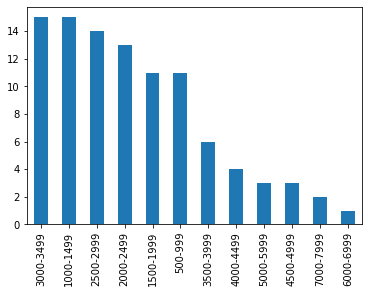

In [25]:
data['lencat'].value_counts().plot(kind='bar')

The most common lengths for privacy policies seem to be 3000-3499 and 1000-1499 words. According to [wordcounter.io](https://wordcounter.io/faq/how-many-pages-is-1500-words/), 3000-3499 words is like a 12-14 page paper, double spaced. 1000-1499 words is 4-6 pages, double spaced. It is also promising to see quite a few policies below 1000 words. A shorter privacy policy means that people are probably more inclined to read it.  
  
However, there are a couple policies that are worryingly large. There are two policies that are from 7000-7999 words long, which is approximately 30 pages, double spaced. This is ten pages longer than my limit for my research paper during my senior year of high school, and to expect someone to be able to read these policies is ridiculous. Let's check out which policies are over 7000 words.  

In [22]:
data['titles'][pd.Index(data['lencat']).get_loc('7000-7999')]

29     Barnes and Noble
112          Latin Post
Name: titles, dtype: object

This is interesting. Barnes and Noble's policy being long makes a good bit of sense, since there's probably some form of data collection for online orders. I don't know much about Latin Post, though. While it makes sense that B&N's policy is long, that doesn't mean it should be, especially for a website that handles transactions. 